# Mall Customers Clustering

## Goal

The goal of using K-Means Clustering in mall customer analysis is to segment customers based on their purchasing behavior. This helps businesses to:
1. Identify Customer Groups – Understand different spending patterns.
2. Improve Marketing Strategies – Personalize promotions for each segment.
3. Enhance Customer Experience – Offer better services based on customer behavior.
4. Optimize Store Layout & Offerings – Place products and stores strategically.
By clustering customers using features like Annual Income, Spending Score, and Age, businesses can make data-driven decisions to boost sales and customer satisfaction.

## Setup
### Importing the necessary libraries that will be used for this project

In [1]:
# Library
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

## Data Preparation

In [2]:
# Define Dataset
X,__=make_classification(n_samples=1000, n_features=2, n_informative=2,
n_redundant=0, n_clusters_per_class=1, random_state=4)

In [3]:
X

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

## Clustering Preparation

In [4]:
# Define The Model
model=KMeans(n_clusters=2, random_state=4)

In [5]:
# Fit The Model
model.fit(X)

KMeans(n_clusters=2, random_state=4)

In [6]:
# Cluster Centroid
print(model.cluster_centers_)

[[ 0.89911301 -0.31643189]
 [-0.87932686 -1.61020833]]


In [7]:
# Assign a Cluster To Each Sample
label=model.predict(X)

In [8]:
# Retrive Unique Clusters
clusters=unique(label)
clusters

array([0, 1])

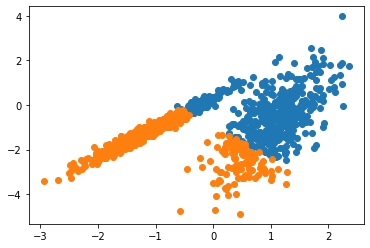

In [9]:
# Create Scatter Plot for Samples from Each Cluster
for cluster in clusters:
    # Get Row Indexes for Samples with This Cluster
    row_ix=where(label==cluster)
    # Create Scatter of These Samples
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
# Show The Plot
pyplot.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset preparation and display the data

In [12]:
# Import Dataset 'Mall_Customers.csv'
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Cleaning
### Checking for missing data

In [15]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Clustering

In [16]:
wcss=[] #Within Cluster Sum of Squares
for i in range(1, 15):
    kmeans=KMeans(n_clusters=i, random_state=14)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

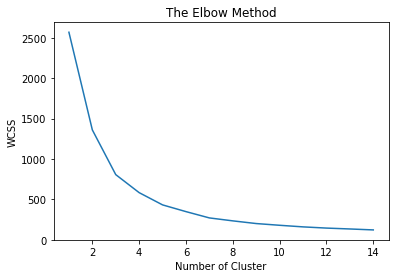

In [17]:
# Elbow Method Visualization
plt.plot (range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [18]:
pip install yellowbrick

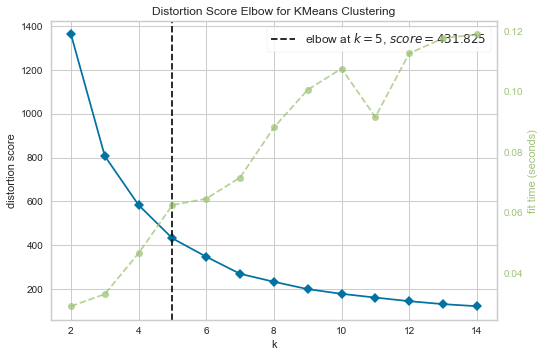

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M=KElbowVisualizer(KMeans(),k=14)
Elbow_M.fit(X)
Elbow_M.show()

In [20]:
# Cluster=5
kmeans=KMeans(n_clusters=5, random_state=14)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=14)

In [21]:
kmeans.labels_

array([1, 4, 4, 1, 3, 0, 1, 3, 3, 3, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 3,
       4, 2, 3, 2, 1, 0, 1, 1, 4, 1, 1, 4, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       4, 1, 0, 1, 0, 2, 3, 2, 3, 2, 1, 1, 3, 1, 4, 1, 0, 0, 1, 1, 2, 1,
       4, 2, 2, 1, 1, 0, 0, 0, 3, 4, 2, 4, 3, 1, 0, 0, 0, 1, 3, 4, 3, 2,
       0, 1, 2, 3, 4, 0, 1, 3, 2, 2, 2, 1, 3, 1, 1, 2, 0, 3, 2, 2, 1, 4,
       4, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 4, 0, 3, 2, 4, 4, 4,
       1, 4, 2, 2, 0, 4, 0, 0, 4, 1, 1, 2, 2, 0, 2, 4, 3, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 4, 3, 4, 3, 2, 1, 1, 3, 1, 2, 3, 1, 1, 0, 4, 0, 3, 1,
       0, 2, 0, 2, 1, 3, 1, 1, 1, 4, 3, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1,
       1, 4, 1, 4, 0, 2, 1, 2, 0, 0, 1, 2, 2, 4, 0, 1, 1, 4, 3, 1, 4, 2,
       1, 2, 4, 3, 2, 2, 3, 4, 1, 2, 4, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2,
       4, 3, 3, 0, 3, 3, 1, 0, 0, 3, 2, 3, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 4, 4, 0, 2, 3, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       3, 1, 1, 0, 2, 2, 1, 4, 2, 2, 3, 1, 2, 3, 2,

In [22]:
hasil_kmeans=X.copy()
hasil_kmeans["Cluster"]=kmeans.labels_
hasil_kmeans.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Value of X axis and Y axis
cluster_x= hasil_kmeans["Cluster"].value_counts().index
cluster_y= hasil_kmeans["Cluster"].value_counts().values

## Visualizing 

In [ ]:
# Visualize
sns.barplot(cluster_x, cluster_y)
plt.title("Frequency of Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show

In [ ]:
# Feature/Variable Values for Each Cluster
ann_kmeans0= hasil_kmeans[hasil_kmeans["Cluster"]==0].iloc[:,0]
spend_kmeans0= hasil_kmeans[hasil_kmeans["Cluster"]==0].iloc[:,1]

ann_kmeans1= hasil_kmeans[hasil_kmeans["Cluster"]==1].iloc[:,0]
spend_kmeans1= hasil_kmeans[hasil_kmeans["Cluster"]==1].iloc[:,1]

ann_kmeans2= hasil_kmeans[hasil_kmeans["Cluster"]==2].iloc[:,0]
spend_kmeans2= hasil_kmeans[hasil_kmeans["Cluster"]==2].iloc[:,1]

ann_kmeans3= hasil_kmeans[hasil_kmeans["Cluster"]==3].iloc[:,0]
spend_kmeans3= hasil_kmeans[hasil_kmeans["Cluster"]==3].iloc[:,1]

ann_kmeans4= hasil_kmeans[hasil_kmeans["Cluster"]==4].iloc[:,0]
spend_kmeans4= hasil_kmeans[hasil_kmeans["Cluster"]==4].iloc[:,1]

In [ ]:
# Centre of Cluster (Centroid)
centroid_cluster=kmeans.cluster_centers_
centroid_cluster

In [ ]:
# Visualize the result of cluster
plt.scatter(ann_kmeans0, spend_kmeans0, s=80, c='blue', label='Cluster 1')
plt.scatter(ann_kmeans1, spend_kmeans1, s=80, c='orange', label='Cluster 2')
plt.scatter(ann_kmeans2, spend_kmeans2, s=80, c='green', label='Cluster 3')
plt.scatter(ann_kmeans3, spend_kmeans3, s=80, c='red', label='Cluster 4')
plt.scatter(ann_kmeans4, spend_kmeans4, s=80, c='magenta', label='Cluster 5')
#Centroid
plt.scatter(centroid_cluster[:,0], centroid_cluster[:,1], s=160, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show

## Conclusion
The scatter plot represents the segmentation of customers based on Annual Income and Spending Score using K-Means Clustering. The data is grouped into five distinct clusters, each represented by different colors, with centroids marked in black.

Key Observations:
Cluster 1 (Blue - Moderate Income, Moderate Spending):

Customers with moderate income (around $40k–60k).
They have a medium spending score (30–60).
These may represent average shoppers who spend reasonably.
Cluster 2 (Green - Low Income, High Spending):

Customers with low income (below $40k).
They have a high spending score (above 60).
Likely includes loyal customers who spend more despite lower income.
Cluster 3 (Orange - High Income, High Spending):

Customers with high income (above $80k).
They also have a high spending score (above 60).
Likely represents premium customers who contribute the most to revenue.
Cluster 4 (Pink - Low Income, Low Spending):

Customers with low income (below $40k).
Their spending score is also low (below 40).
Likely represents budget-conscious shoppers or infrequent buyers.
Cluster 5 (Red - High Income, Low Spending):

Customers with high income (above $80k).
They have a low spending score (below 40).
These might be wealthy but conservative shoppers who don’t spend much.

## Business Insights
Premium customers (Cluster 3) should be prioritized for high-end products and loyalty programs.
Low-income, high-spending customers (Cluster 2) could be targeted with discounts or incentives to maintain their loyalty.
High-income, low-spending customers (Cluster 5) present an opportunity for targeted marketing to encourage higher spending.
This clustering helps businesses optimize marketing strategies, personalize offers, and improve customer retention.

## Saving Clustering Results

In [ ]:
dataset['cluster']=kmeans.labels_
dataset.head()

In [ ]:
dataset.to_excel("Clustering_K-Means.xlsx", sheet_name='K-Means', index=False)